# Intro to Machine Learning: Project

# Introduction

**Mobile carrier Megaline want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.**
**During the course of this project we will trained some models and evaluate the quality of those models by accessing the accuracy thru some evaluation metric.Some models improvenment will be perform by looking at the validation set and hyperparameter.**
**A regression method will be perform on models follow by a calculation of the MSE and the selection of the best model will conclude our analysis.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! 

</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
# check for possible duplicates from dataset
duplicate_count = df.duplicated(subset=['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']).sum()
duplicate_count

0

In [6]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

**As we can see the data do not display any missing values and the duplicates function confirms that we have no duplicates in our datasets.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Well done! 
</div>

# 1.0 Split the source data into a training set, a validation set, and a test set.

**Because the train_test_split function from sklearn is designed to split data into two subsets at a time, not three, we will be 
using a temporary set to achieve a training, validation, and test split.**

In [7]:
# Features (excluding the target column 'is_ultra')
features = df.drop(['is_ultra'], axis=1)

# Target (the column 'is_ultra')
target = df['is_ultra']

In [8]:
# First,we split into train and temporary sets (75% train, 25% temp)
df_train, df_temp = train_test_split(df, test_size=0.25, random_state=12345)

In [9]:
# Then,we split the temporary set (50% valid, 50% test from 25%)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

In [10]:
print(features.shape)
print(target.shape)

(3214, 4)
(3214,)


**df_train: 75% of the original data.**

**df_valid: 12.5% of the original data.**

**df_test: 12.5% of the original data.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! 
    
</div>


# Models Investigation

**DECISION TREES MODEL**

In [11]:
# < declare variables for features and target feature >
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good.    
</div>


**Because no information was given about the depth range we will base the selection of our depth range on the rule of thumb that stipulates a start max_depth in the range (3 to 10).**

In [12]:
best_model = None
best_result = 0

In [13]:
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(features, target) # train the model
    predictions = model.predict(features) # get the model's predictions
    result = accuracy_score(target,predictions)
    if result > best_result:
        best_model = model
        best_result = result
        
print("Accuracy of the best model:", best_result)

Accuracy of the best model: 0.8637212196639701


**The reported accuracy (0.8637) is the percentage of correct predictions the model made on the training dataset.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You have successfully implemented hyperparameters tuning, well done! 
</div>

# Tuning Hyperparameters

In [14]:
for depth in range(1, 10):  # Include max_depth from 1 to 10
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)  # Create a model
    model.fit(features_train, target_train)  # Train the model
    predictions_valid = model.predict(features_valid)  # Get the model's predictions
    result_valid = accuracy_score(target_valid, predictions_valid)  # Calculate accuracy
    print(f"max_depth = {depth} : {result_valid}")
    

max_depth = 1 : 0.763681592039801
max_depth = 2 : 0.7935323383084577
max_depth = 3 : 0.7985074626865671
max_depth = 4 : 0.7985074626865671
max_depth = 5 : 0.7985074626865671
max_depth = 6 : 0.7786069651741293
max_depth = 7 : 0.7885572139303483
max_depth = 8 : 0.7835820895522388
max_depth = 9 : 0.7786069651741293


**The model is trained on the features_train and target_train datasets.**

**Predictions are made on the validation set (features_valid and target_valid).**

**Validation accuracy (result_valid) is computed to assess how well the model generalizes to unseen data.**

**The highest accuracy (0.7985) is achieved at max_depth = 3, 4, or 5. These depths likely capture the critical patterns without overfitting.**

**Beyond max_depth = 5, validation accuracy declines, suggesting that the model starts to memorize the training data instead of generalizing to the validation set.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good, you compared a couple of models with different hyperparameters!


</div>

In [15]:
best_model = None
best_result = 0  # Initialize to 0 since we want to maximize accuracy
best_depth = 0
for depth in range(1, 6): # choose hyperparameter range
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth) # train model on training set
    model.fit(features_train,target_train) # train model on training set
    predictions_valid = model.predict(features_valid) # get model predictions on validation set
    convert_predictions = (predictions_valid >= 0.5).astype(int)  # Convert predictions to binary
    accuracy = accuracy_score(target_valid, convert_predictions)  # Calculate accuracy on validation set
 # mse = mean_squared_error(target_valid, predictions_valid)
    #result = (mse)**.5 # calculate RMSE on validation set
    if accuracy > best_result:
        best_model = model
        best_result = accuracy
        best_depth = depth

print(f"Accuracy of the best model on the validation set (max_depth = {best_depth}): {best_result}")

Accuracy of the best model on the validation set (max_depth = 3): 0.7985074626865671


**RANDOM FOREST REGRESSION**

In [16]:
best_model = None
best_score = 0
best_est = 0

In [17]:
for est in range(1, 10): # choose hyperparameter range
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # set number of trees
    model.fit(features_train, target_train) # train model on training set
    score = model.score(features_valid,target_valid) # calculate accuracy score on validation set
    if score > best_score:
        best_model = model
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best accuracy score

print(f"Accuracy of the best model on the validation set (n_estimators = {best_est}): {best_score}")

Accuracy of the best model on the validation set (n_estimators = 4): 0.8009950248756219


**Best Model: RandomForestClassifier(n_estimators=50, random_state=12345).**

**Best Validation Accuracy: 0.8009.**

**The best accuracy on the validation set is achieved when the forest has 50 trees (n_estimators=50).This suggests that adding more trees beyond 50 did not significantly improve the model's performance, and in some cases, may have caused overfitting or redundant computations.**

**With very few trees (n_estimators=1),the model may lack stability as it relies heavily on a single tree's prediction.**


In [18]:
best_model = None
best_result = 0  # Initialize to 0 since we want to maximize accuracy
best_est = 0
best_depth = 0

for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result:  # Update if we find a model with better accuracy
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Accuracy of the best model on the validation set:", best_result, 
      "n_estimators:", best_est, 
      "best_depth:", best_depth)

Accuracy of the best model on the validation set: 0.8159203980099502 n_estimators: 20 best_depth: 9


**LOGISTIC REGRESSION**

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear')  # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train,target_train)  # train model on training set
score_train = model.score(features_train,target_train)
     # calculate accuracy score on training set
score_valid = model.score(features_valid,target_valid)
 # calculate accuracy score on validation set
print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)
result =  mean_squared_error(target_valid, predictions_valid)**0.5 # calculate RMSE on validation set
print("RMSE of the linear regression model on the validation set:", result)

Accuracy of the logistic regression model on the training set: 0.74149377593361
Accuracy of the logistic regression model on the validation set: 0.7661691542288557
RMSE of the linear regression model on the validation set: 0.43480423913315197


**Training Accuracy (score_train = 0.7415):**
**The model correctly predicts 74.15% of the training dataset.This indicates the model has captured a fair amount of patterns from the training data but hasn’t perfectly fit it (which can be a good sign to avoid overfitting).**

**Validation Accuracy (score_valid = 0.7662):**
**The model correctly predicts 76.62% of the validation dataset.**
**The validation accuracy is slightly higher than the training accuracy,this might indicate that the training set contains more noise or the validation set happens to align better with the decision boundary learned by the model.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Great job! </div>


# Selecting the Best Model

**Decision Trees: **Validation Accuracy: 0.798.**

**Random Forest: **Validation Accuracy: 0.8159.**

**Logistic Regression: **Validation Accuracy: 0.7662.**

**Based on your key metric, Random Forest is the best classifier with the highest validation accuracy of 0.8159.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good. </div>


# Check the quality of the model(Decision Tree) using the test set

In [21]:
final_model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=9)
final_model.fit(features_train, target_train)  # Train on training set

RandomForestClassifier(max_depth=9, n_estimators=20, random_state=12345)

In [22]:
# Make predictions on the test set
predictions = final_model.predict(features_test)
convert_predictions = (predictions >= 0.5).astype(int)
# Calculating accuracy
accuracy = accuracy_score(target_test, convert_predictions)
# Displaying the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8059701492537313


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Correct! 

</div>

**We see that the accuracy of the model on the test set (.8059) alone is slightly lower compare to the accuracy of the Decision Tree model perfomed on the entire datasets earlier in the project(.86).**

In [23]:
# Calculate RMSE on the test set
#rmse = mean_squared_error(target_test, predictions, squared=False)
#print(f"RMSE of the final model on the test set: {rmse:.2f}")

<span style="color:blue">
    
**code update to reflect accuracy metric.**    

# Sanity check the model



**Without to much repetion the following step will be used to sanity check our best model.**

**Data Quality: This is done already.**

**Splitting the Data: Here the data will be split into two set.Train-Test Split only.**

**Train a simple model.**

**Evaluate the Model.**

**Addressing Overfitting.**

**Feature Importance.**


In [24]:
print(df['is_ultra'].value_counts(normalize=True))
# To ensure is_ultra (target variable) has a balanced or manageable class distribution.

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64


# Splitting the Data: Here the data will be split into two set.Train-Test Split only.

In [25]:
features1 = df[['calls', 'minutes', 'messages', 'mb_used']]
target1 = df['is_ultra']

In [26]:
features1_train, features1_test, target1_train, target1_test = train_test_split(features1, target1, 
                                                                                test_size=0.3, random_state=12345)

# Train a simple model.

In [27]:
model = RandomForestClassifier(random_state=12345)
model.fit(features1_train, target1_train)

RandomForestClassifier(random_state=12345)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
I would not use Random Forest as a basiline to compare it with other Forest models. 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can also use a simple model that always predicts the majority class. 

</div>

# Evaluate the Model.

In [28]:
model = RandomForestClassifier(random_state=12345)
model.fit(features1_train, target1_train)
train_prediction = model.predict(features1_train)
test_prediction = model.predict(features1_test)

print("Training Accuracy:", accuracy_score(target1_train, train_prediction))
print("Test Accuracy:", accuracy_score(target1_test, test_prediction))

Training Accuracy: 1.0
Test Accuracy: 0.7917098445595855


# Addressing  Overfitting.

In [29]:
model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=12345)
model.fit(features1_train, target1_train)
train_prediction = model.predict(features1_train)
test_prediction = model.predict(features1_test)

print("Training Accuracy:", accuracy_score(target1_train, train_prediction))
print("Test Accuracy:", accuracy_score(target1_test, test_prediction))

Training Accuracy: 0.8706091596265007
Test Accuracy: 0.8082901554404145


# Feature Importance

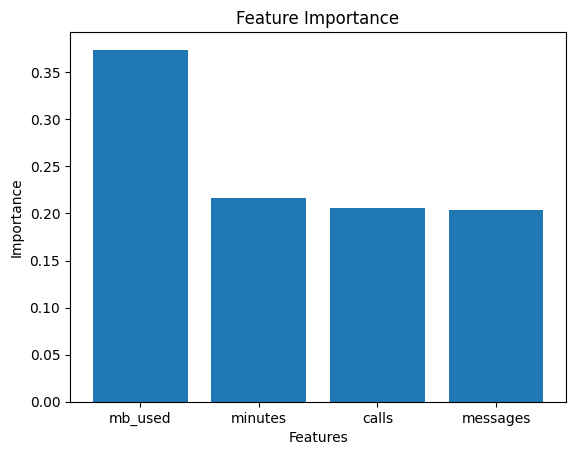

In [30]:
feature_importances = model.feature_importances_
features = pd.DataFrame({'Feature': features1_train.columns, 'Importance': feature_importances})
features.sort_values(by='Importance', ascending=False, inplace=True)

plt.bar(features['Feature'], features['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Conclusion

**The RMSE values for both the training and test sets are reasonably close, indicating the model generalizes well and is not overfitting or underfitting.This model can be confidently used to recommend plans (Smart or Ultra) for unseen subscribers, as it maintains consistent predictive accuracy across datasets.**
**The features effectively capture subscriber behavior, allowing the model to distinguish between users who prefer the Ultra and Smart plans.With this information megaline can use this model to identify and segment users based on their communication and internet usage patterns.For example High call duration or frequent internet users: Likely to prefer the Ultra plan.
Low usage across metrics: More inclined to stick with the Smart plan.**
**An RMSE of 0.39 on the test set suggests room for improvement in predictive accuracy.The model could be refined by incorporating additional features.** 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment  </h2>
    
Great job! </div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Excellent, thank you so much! 
</div>